In [123]:
import pandas as pd
import numpy as np
import sklearn

In [124]:
file_path='C:/Users/NHIEN/Downloads/healthcare-dataset-stroke-data.csv'

In [125]:
df=pd.read_csv(file_path)

In [126]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [127]:
df.shape

(5110, 12)

In [128]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [129]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [131]:
columns_to_convert = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
for column in columns_to_convert:
    df[column]=df[column].astype('category')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


In [133]:
df[df.duplicated(subset=['id'],keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [134]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [135]:
df.drop(['id'],axis=1,inplace=True)

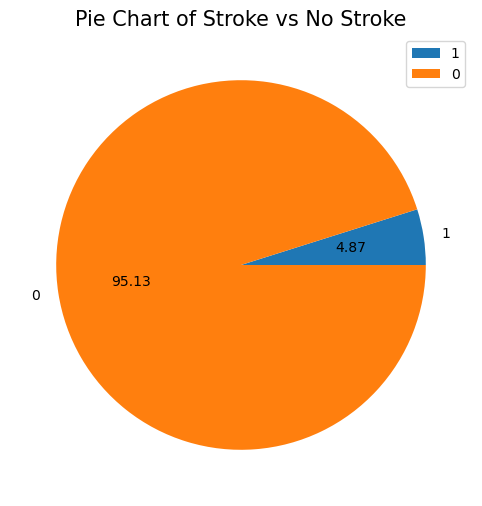

In [136]:
import matplotlib.pyplot as plt
has_stroke = df.loc[df['stroke']==1,'stroke'].count()
no_stroke = df.loc[df['stroke']==0,'stroke'].count()
label=['1','0']
patches = plt.pie([has_stroke,no_stroke], labels=label,autopct='%.2f')
plt.legend(label)
plt.title('Pie Chart of Stroke vs No Stroke', fontsize=15)
plt.show()

In [137]:
df.drop(['hypertension','ever_married','work_type','bmi','smoking_status'],axis=1,inplace=True)

In [138]:
df=df.drop(df.index[498:])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             498 non-null    category
 1   age                498 non-null    float64 
 2   heart_disease      498 non-null    category
 3   Residence_type     498 non-null    category
 4   avg_glucose_level  498 non-null    float64 
 5   stroke             498 non-null    category
dtypes: category(4), float64(2)
memory usage: 10.3 KB


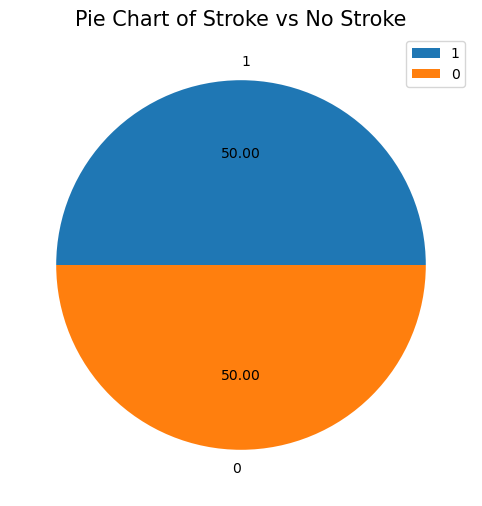

In [140]:
has_stroke = df.loc[df['stroke']==1,'stroke'].count()
no_stroke = df.loc[df['stroke']==0,'stroke'].count()
label=['1','0']
patches = plt.pie([has_stroke,no_stroke], labels=label,autopct='%.2f')
plt.legend(label)
plt.title('Pie Chart of Stroke vs No Stroke', fontsize=15)
plt.show()

In [141]:
display(df)

,gender,age,heart_disease,Residence_type,avg_glucose_level,stroke
0,Male,67.0,1,Urban,228.69,1
1,Female,61.0,0,Rural,202.21,1
2,Male,80.0,1,Rural,105.92,1
3,Female,49.0,0,Urban,171.23,1
4,Female,79.0,0,Rural,174.12,1
...,...,...,...,...,...,...
493,Female,23.0,0,Rural,69.24,0
494,Female,55.0,0,Rural,111.19,0
495,Female,71.0,0,Urban,93.28,0
496,Male,5.0,0,Rural,122.19,0


In [142]:
from sklearn.preprocessing import MinMaxScaler 
# apply normalization techniques 
columns_to_convert = ['age','avg_glucose_level']
for column in columns_to_convert:
    df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1)) 
# view normalized data   
display(df) 

,gender,age,heart_disease,Residence_type,avg_glucose_level,stroke
0,Male,0.815634,1,Urban,0.801017,1
1,Female,0.741888,0,Rural,0.678623,1
2,Male,0.975418,1,Rural,0.233557,1
3,Female,0.594395,0,Urban,0.535429,1
4,Female,0.963127,0,Rural,0.548787,1
...,...,...,...,...,...,...
493,Female,0.274828,0,Rural,0.064017,0
494,Female,0.668142,0,Rural,0.257915,0
495,Female,0.864798,0,Urban,0.175133,0
496,Male,0.053589,0,Rural,0.308759,0


In [143]:
# Encoding categorical values
df['gender'] = df['gender'].replace({'Female':0,'Male':1,'Other':2}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)

In [144]:
columns_to_convert = ['gender','heart_disease','Residence_type','stroke']

for column in columns_to_convert:
    df[column] = df[column].astype('category')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             498 non-null    category
 1   age                498 non-null    float64 
 2   heart_disease      498 non-null    category
 3   Residence_type     498 non-null    category
 4   avg_glucose_level  498 non-null    float64 
 5   stroke             498 non-null    category
dtypes: category(4), float64(2)
memory usage: 10.3 KB


In [146]:
df.head()

,gender,age,heart_disease,Residence_type,avg_glucose_level,stroke
0,1,0.815634,1,1,0.801017,1
1,0,0.741888,0,0,0.678623,1
2,1,0.975418,1,0,0.233557,1
3,0,0.594395,0,1,0.535429,1
4,0,0.963127,0,0,0.548787,1


In [147]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [149]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((398, 5), (100, 5), (398,), (100,))

In [150]:
from sklearn.svm import SVC
svc=SVC()
_=svc.fit(X_train,y_train) #Fit your model to the training data.

In [151]:
train_score_c4=svc.score(X_train,y_train)
test_score_c4=svc.score(X_test,y_test)
print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset: {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.75
Classical SVC on the test dataset: 0.74


c:\Users\NHIEN\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:282: UserWarning: Style JSON file 'clifford.json' not found in any of these locations: c:\Users\NHIEN\anaconda3\lib\site-packages\qiskit\visualization\circuit\styles\clifford.json, clifford.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


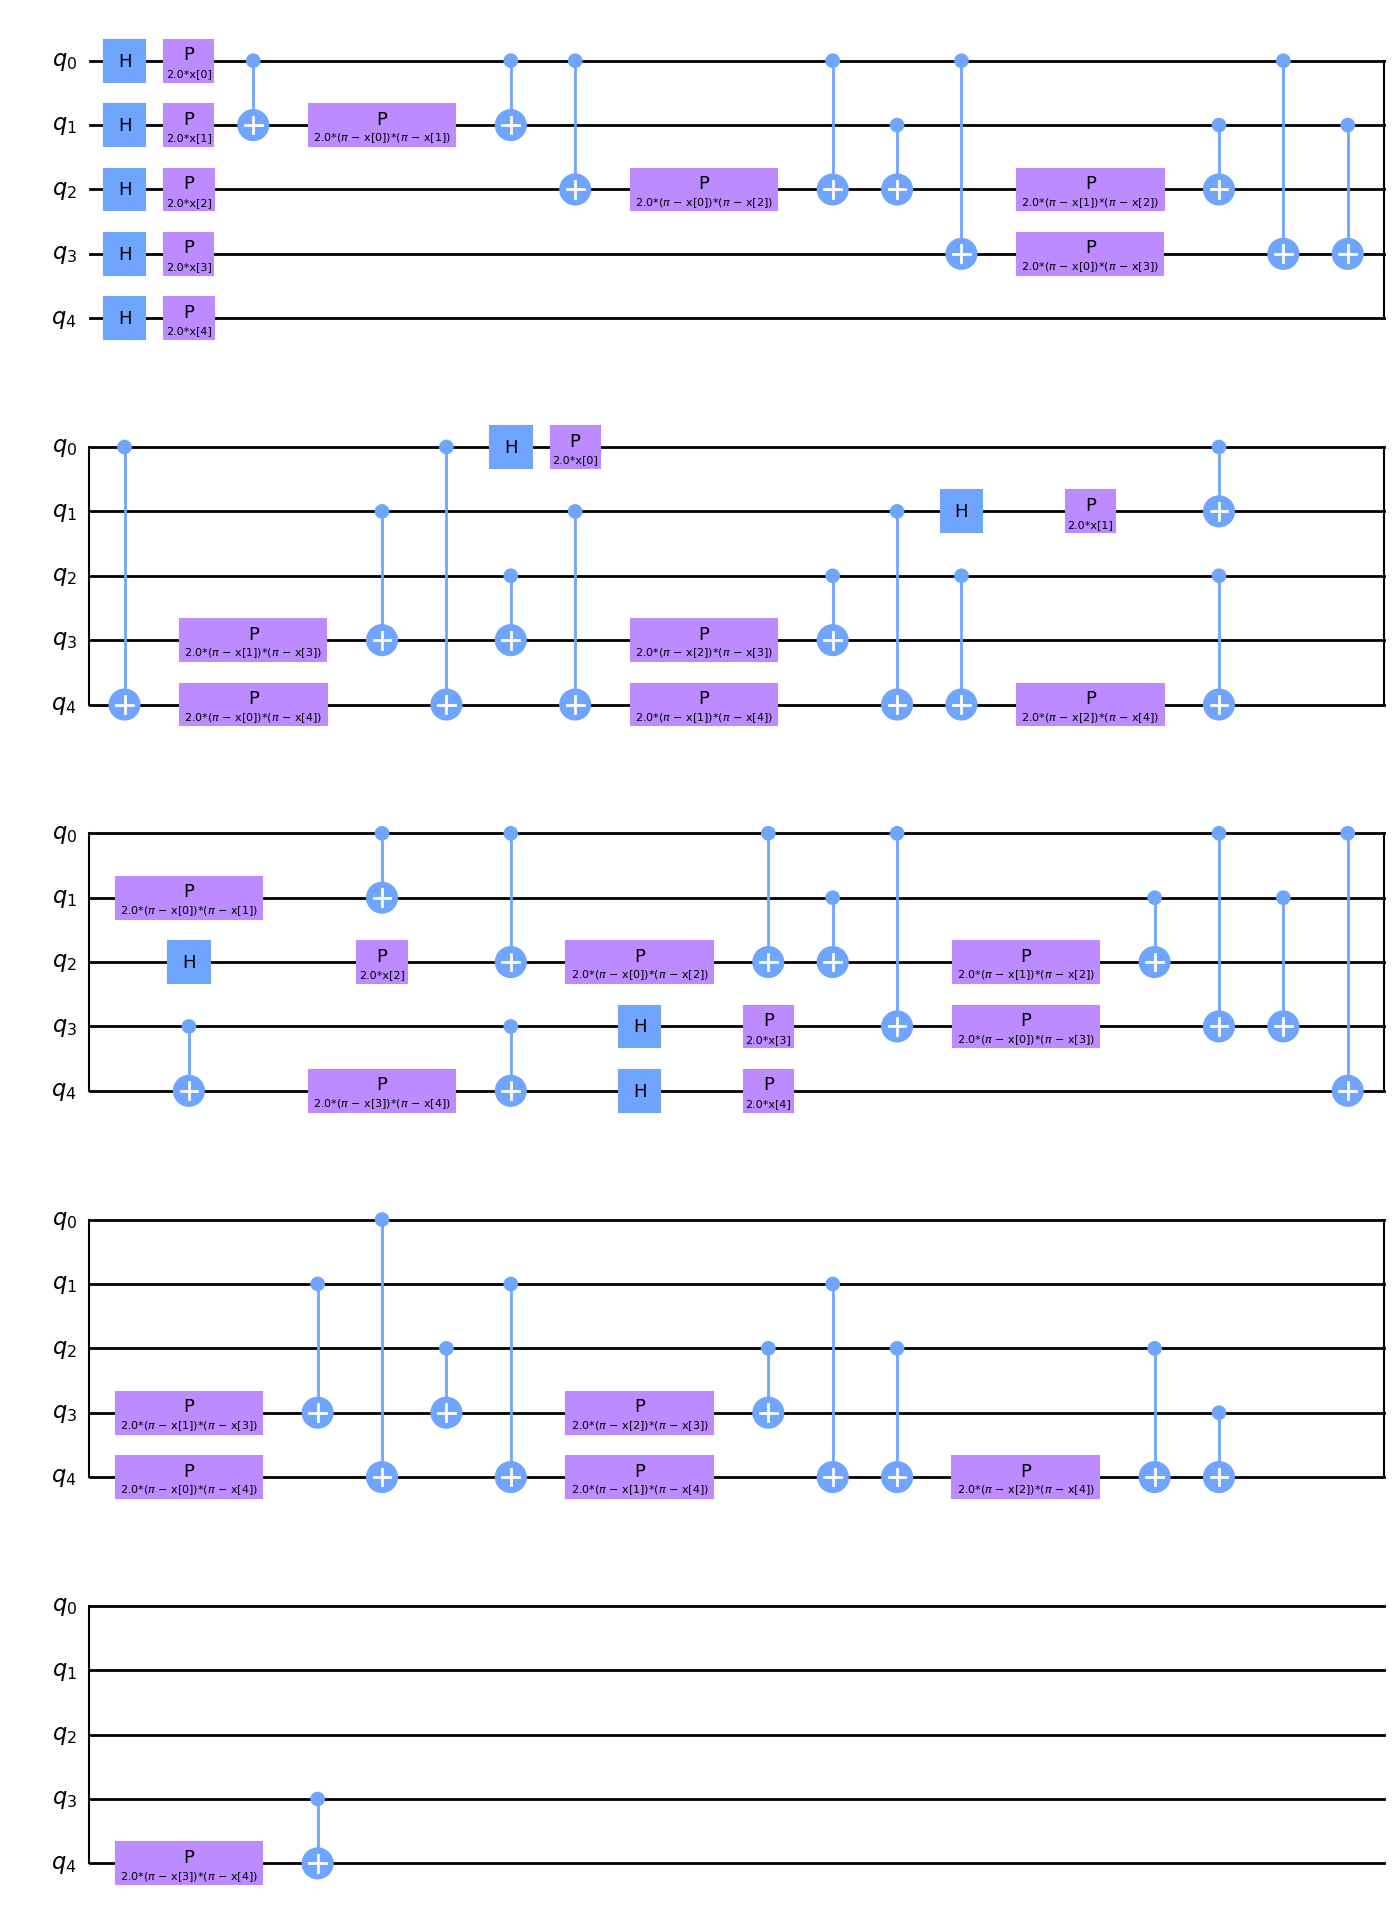

In [152]:
from qiskit.circuit.library import ZZFeatureMap
num_features=X_train.shape[1]
feature_map=ZZFeatureMap(feature_dimension=num_features,reps=2)
feature_map.decompose().draw(output="mpl",style="clifford",fold=20)

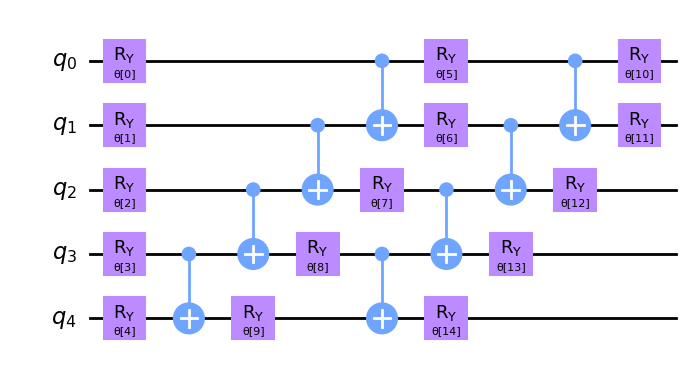

In [153]:
#Parameters x[0],..., x[3] are place holders for our features.
#Now we create and plot our ansatz. 
from qiskit.circuit.library import RealAmplitudes
ansatz=RealAmplitudes(num_qubits=num_features,reps=2)
ansatz.decompose().draw(output="mpl",style="clifford",fold=20)

In [154]:
from qiskit_algorithms.optimizers import COBYLA
optimizer=COBYLA(maxiter=100)

In [155]:
from qiskit.primitives import Sampler
sampler=Sampler()

In [156]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

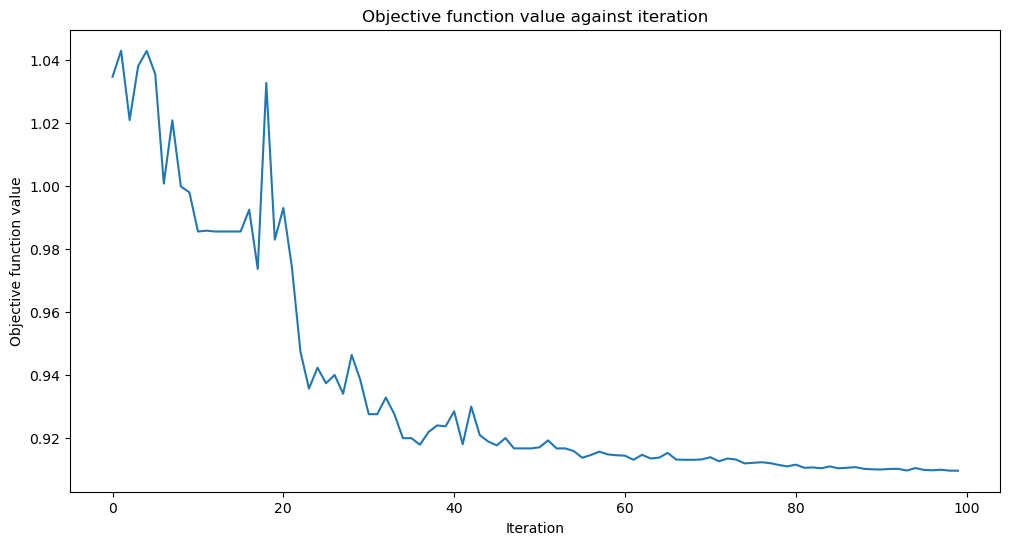

Training time: 1069 seconds


In [162]:
from qiskit_machine_learning.algorithms.classifiers import VQC
import time
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)
# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(np.array(X_train.to_numpy()),np.array(y_train.to_numpy()))
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [168]:
train_score_q4 = vqc.score(X_train, y_train)
test_score_q4 = vqc.score(X_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset: {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.65
Quantum VQC on the test dataset: 0.58
